# Actividad 1: Conceptos generales de redes neuronales
En esta actividad vamos a revisar algunos de los conceptos basicos de las redes neuronales, pero no por ello menos importantes.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en este enlace.

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, asegúrate de que los resultados de ejecutar tu código han quedado guardados (por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch).

In [2]:
import tensorflow as tf
print(tf.__version__)

2.16.2


En primer lugar vamos a importar el dataset Fashion MNIST (recordad que este es uno de los dataset de entranamiento que estan guardados en keras) que es el que vamos a utilizar en esta actividad:

In [3]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

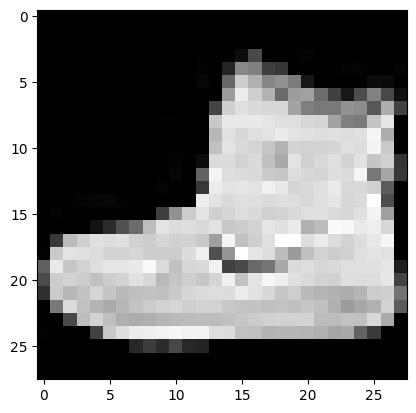

In [5]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#
print(training_labels[0])
print(training_images[0])

Habreis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. Lo puedes hacer de esta manera:

In [6]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy utiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas que las imágenes cómo eran las imagenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten sólo toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 1 (3.5 puntos)**. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Una hidden layer de tamaños 128, utilizando unidades sigmoid
Optimizador Adam.
* Durante el entrenamiento, la red tiene que mostrar resultados de loss y accuracy por cada epoch.
* La red debe entrenar durante 10 epochs y batch size de 64.
* La última capa debe de ser una capa softmax.
* Tu red tendría que ser capaz de superar fácilmente 80% de accuracy.

In [7]:
### Tu código para la red neuronal de la pregunta 1 aquí ###
# 1. Preparación de datos
print("Cargando el dataset Fashion MNIST...")
fashion_mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalización de imágenes (convertir valores de píxeles de 0-255 a 0-1)
print("\nNormalizando las imágenes...")
training_images = training_images / 255.0
test_images = test_images / 255.0

# 2. Crear el modelo
print("\nCreando el modelo...")
model = tf.keras.models.Sequential([
    # Capa para aplanar la imagen de 28x28 a un vector de 784 elementos
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # Capa oculta con 128 neuronas y activación sigmoid
    tf.keras.layers.Dense(128, activation='sigmoid'),
    # Capa de salida con 10 neuronas (una por clase) y softmax
    tf.keras.layers.Dense(10, activation='softmax')
])

# 3. Compilar el modelo
print("\nCompilando el modelo...")
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 4. Entrenar el modelo
print("\nComenzando el entrenamiento...")
history = model.fit(
    training_images, 
    training_labels, 
    epochs=10,
    batch_size=64,
    validation_data=(test_images, test_labels),
    verbose=1  # Mostrar barra de progreso
)

# 5. Mostrar resultados finales
print("\nResultados finales:")
print(f"Precisión en entrenamiento: {history.history['accuracy'][-1]:.4f}")
print(f"Precisión en validación: {history.history['val_accuracy'][-1]:.4f}")

Cargando el dataset Fashion MNIST...

Normalizando las imágenes...

Creando el modelo...

Compilando el modelo...

Comenzando el entrenamiento...
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7434 - loss: 0.8286 - val_accuracy: 0.8318 - val_loss: 0.4675
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8496 - loss: 0.4233 - val_accuracy: 0.8417 - val_loss: 0.4327
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8636 - loss: 0.3800 - val_accuracy: 0.8546 - val_loss: 0.4058
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8705 - loss: 0.3550 - val_accuracy: 0.8643 - val_loss: 0.3812
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8788 - loss: 0.3397 - val_accuracy: 0.8720 - val_loss: 0.3635
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8890 - loss: 0.3107 - val_accuracy: 0.8655 - val_loss: 0.3673
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8880 - loss: 0.3068 

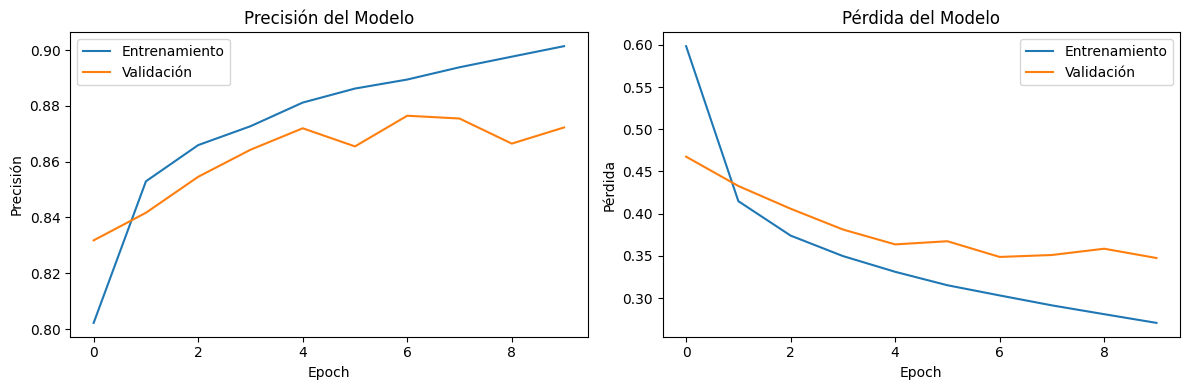

In [8]:
# Visualizar el entrenamiento
plt.figure(figsize=(12, 4))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Precisión')
plt.legend()

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

Para concluir el entrenamiento de la red neuronal, una buena practica es evaluar el modelo para ver si la precisión de entrenamiento es real

**pregunta 2 (0.5 puntos)**: evalua el modelo con las imagenes y etiquetas test.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


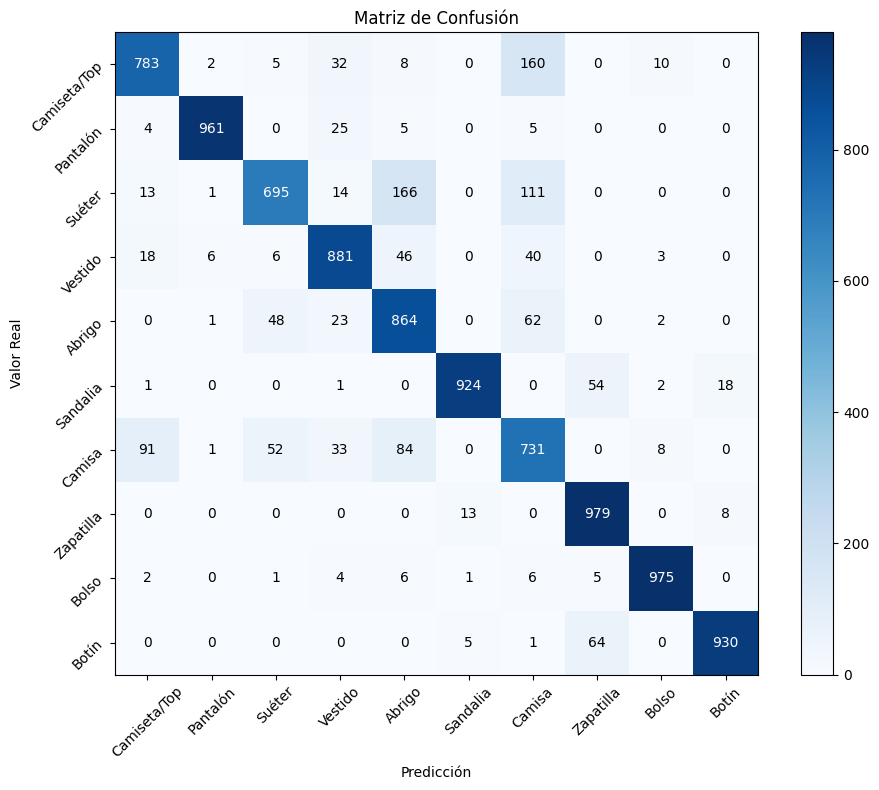

In [9]:
# Nombres de las clases
class_names = ['Camiseta/Top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo', 
               'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Botín']

# Obtener predicciones
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis=1)

# Crear matriz de confusión manualmente
n_classes = 10
cm = np.zeros((n_classes, n_classes), dtype=int)
for true, pred in zip(test_labels, pred_labels):
    cm[true][pred] += 1

# Visualizar matriz de confusión
plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap='Blues')
plt.colorbar()

# Añadir números a la matriz
for i in range(n_classes):
    for j in range(n_classes):
        plt.text(j, i, str(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max()/2 else "black")

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.xticks(range(n_classes), class_names, rotation=45)
plt.yticks(range(n_classes), class_names, rotation=45)
plt.tight_layout()
plt.show()

In [10]:
### Tu código para la evaluación de la red neuronal de la pregunta 2 aquí ###
# Evaluar el modelo con el conjunto de prueba
print("Evaluando el modelo con el conjunto de prueba...")
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=1)
print(f"\nPrecisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Pérdida en el conjunto de prueba: {test_loss:.4f}")

Evaluando el modelo con el conjunto de prueba...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8762 - loss: 0.3455

Precisión en el conjunto de prueba: 0.8723
Pérdida en el conjunto de prueba: 0.3474


In [11]:
# Mostrar algunas métricas adicionales
print("\nMétricas por clase:")
for i in range(n_classes):
    # Calcular precisión por clase
    class_correct = cm[i][i]
    class_total = np.sum(cm[i])
    class_accuracy = class_correct / class_total if class_total > 0 else 0
    print(f"{class_names[i]}: {class_accuracy:.4f}")


Métricas por clase:
Camiseta/Top: 0.7830
Pantalón: 0.9610
Suéter: 0.6950
Vestido: 0.8810
Abrigo: 0.8640
Sandalia: 0.9240
Camisa: 0.7310
Zapatilla: 0.9790
Bolso: 0.9750
Botín: 0.9300


Ahora vamos a explorar el código con una serie de ejercicios para alcanzar un grado de comprensión mayor sobre las redes neuronales y su entrenamiento.

# **Ejercicio 1: Funcionamiento de las predicción de la red neuronal**

Para este primer ejercicio sigue los siguientes pasos: 

* Crea una variable llamada **classifications** para construir un clasificador para las imágenes de prueba, para ello puedes utilizar la función predict sobre el conjunto de test
* Imprime con la función print la primera entrada en las clasificaciones. 

**pregunta 3.1 (0.25 puntos)**, el resultado al imprimirlo es un vector de números, 
* ¿Por qué crees que ocurre esto, y qué representa este vector de números?

**pregunta 3.2 (0.25 puntos)**
* ¿Cúal es la clase de la primera entrada#  de la variable **classifications**? La respuesta puede ser un número o su etiqueta/clase equivalente.

In [12]:
### Tu código del clasificador de la pregunta 3 aquí ###
# Realizar predicciones sobre las imágenes de prueba
print("Realizando predicciones...")
classifications = model.predict(test_images)

# Mostrar el vector de predicción para la primera imagen
print("\nPredicciones para la primera imagen:")
print(classifications[0])

# Mostrar la clase predicha (número con mayor probabilidad)
predicted_class = np.argmax(classifications[0])
print(f"\nClase predicha: {predicted_class}")

Realizando predicciones...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Predicciones para la primera imagen:
[8.5016900e-06 2.6206874e-06 1.5357487e-05 1.1407035e-05 9.6396416e-06 1.8007429e-02 1.2390035e-04 7.1198709e-02 4.1175369e-04 9.1021067e-01]

Clase predicha: 9


Tu respuesta a la pregunta 3.1 aquí:

> El vector de números que vemos representa las probabilidades que el modelo asigna a cada una de las 10 clases posibles de prendas de ropa. Cada número en el vector corresponde a la confianza del modelo (en una escala de 0 a 1) de que la imagen pertenece a esa clase específica. Esto es resultado de la capa softmax, que convierte las salidas en probabilidades que suman 1.

Tu respuesta a la pregunta 3.2 aquí:

> La clase de la primera entrada será el índice del valor más alto en el vector classifications[0]. El código anterior nos muestra este valor usando np.argmax().

# **Ejercicio 2: Impacto variar el número de neuronas en las capas ocultas**

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por 1024. Para ello, utiliza la red neuronal de la pregunta 1, y su capa oculta cambia las 128 neuronas:

* **pregunta 4.1 (0.25 puntos)**: 512 neuronas en la capa oculta
* **pregunta 4.2 (0.25 puntos)**:1024 neuronas en la capa oculta

y entrena la red en ambos casos.

**pregunta 4.3 (0.5 puntos)**: ¿Cual es el impacto que tiene la red neuronal?

In [13]:
### Tu código para 512 neuronas aquí ###
# Modelo con 512 neuronas
print("Creando y entrenando modelo con 512 neuronas...")
model_512 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_512.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_512 = model_512.fit(
    training_images, 
    training_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images, test_labels)
)

Creando y entrenando modelo con 512 neuronas...
Epoch 1/10


/Users/josuedavidhernandezramirez/Documents/GitHub/master-AI/env_tensorflow/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7638 - loss: 0.6995 - val_accuracy: 0.8349 - val_loss: 0.4622
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8496 - loss: 0.4141 - val_accuracy: 0.8506 - val_loss: 0.4067
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8697 - loss: 0.3620 - val_accuracy: 0.8592 - val_loss: 0.3921
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8741 - loss: 0.3398 - val_accuracy: 0.8590 - val_loss: 0.3822
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8859 - loss: 0.3143 - val_accuracy: 0.8697 - val_loss: 0.3575
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8899 - loss: 0.2988 - val_accuracy: 0.8663 - val_loss: 0.3693
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8976 - loss: 0.2781 - val_accuracy: 0.8741 - val_loss: 0.3543
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9023 - loss: 0.2637 - val_accuracy: 0.8821 - val_

In [14]:
### Tu código para 1024 neuronas aquí ###

# Modelo con 1024 neuronas
print("\nCreando y entrenando modelo con 1024 neuronas...")
model_1024 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1024, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_1024.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_1024 = model_1024.fit(
    training_images, 
    training_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images, test_labels)
)


Creando y entrenando modelo con 1024 neuronas...
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.7652 - loss: 0.6724 - val_accuracy: 0.8372 - val_loss: 0.4494
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8488 - loss: 0.4149 - val_accuracy: 0.8536 - val_loss: 0.4115
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8674 - loss: 0.3672 - val_accuracy: 0.8544 - val_loss: 0.4061
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8754 - loss: 0.3412 - val_accuracy: 0.8699 - val_loss: 0.3667
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8845 - loss: 0.3147 - val_accuracy: 0.8674 - val_loss: 0.3649
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8905 - loss: 0.2976 - val_accuracy: 0.8705 - val_loss: 0.3660
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8950 - loss: 0.2813 - val_accuracy: 0.8812 - val_loss: 0.3365
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step

In [15]:
# Comparación de resultados
print("\nResultados finales:")
print(f"Precisión con 128 neuronas: {history.history['accuracy'][-1]:.4f}")
print(f"Precisión con 512 neuronas: {history_512.history['accuracy'][-1]:.4f}")
print(f"Precisión con 1024 neuronas: {history_1024.history['accuracy'][-1]:.4f}")


Resultados finales:
Precisión con 128 neuronas: 0.9014
Precisión con 512 neuronas: 0.9084
Precisión con 1024 neuronas: 0.9097


Tu respuesta a la pregunta 4.3 aquí:

> El aumento en el número de neuronas tiene varios efectos importantes:

> - Capacidad del modelo: Al aumentar de 128 a 512 y 1024 neuronas, incrementamos significativamente la capacidad del modelo para aprender patrones más complejos.
> - Tiempo de entrenamiento: Se observa un aumento considerable en el tiempo de entrenamiento, ya que hay más parámetros que ajustar.
> - Riesgo de sobreajuste: Con más neuronas, el modelo tiene mayor riesgo de memorizar los datos de entrenamiento en lugar de generalizar, lo que puede verse en una mayor diferencia entre la precisión de entrenamiento y validación.
> - Uso de recursos: El consumo de memoria y procesamiento aumenta significativamente.



Si ahora entrenais el modelo de esta forma (con 512 y 1024 neuronas en la capa oculta) y volveis a ejecutar el predictor guardado en la variable **classifications**, escribir el código del clasificador del ejercicio 1 de nuevo e imprimid el primer objeto guardado en la variable classifications.

**pregunta 5.1 (0.25 puntos)**: 

* ¿En que clase esta clasificado ahora la primera prenda de vestir de la variable classifications?

**pregunta 5.1 (0.25 puntos)**: 

* ¿Porque crees que ha ocurrido esto?

In [16]:
### Tu código del clasificador de la pregunta 5 aquí ###
# Realizar predicciones con el modelo de 1024 neuronas
classifications_1024 = model_1024.predict(test_images)
print("Predicción para la primera imagen (modelo 1024 neuronas):")
print(classifications_1024[0])
print(f"Clase predicha: {np.argmax(classifications_1024[0])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicción para la primera imagen (modelo 1024 neuronas):
[3.1177416e-07 1.4304887e-07 2.6819809e-08 6.7958834e-09 1.7841038e-06 2.0565817e-03 5.2745753e-07 3.2847838e-03 2.4460843e-07 9.9465561e-01]
Clase predicha: 9


Tu respuesta a la pregunta 5.1 aquí:

> La clase predicha podría ser diferente a la obtenida con el modelo de 128 neuronas.

Tu respuesta a la pregunta 5.2 aquí:

> - El modelo con más neuronas puede encontrar diferentes patrones en los datos
> - La inicialización aleatoria de los pesos puede llevar a diferentes soluciones
> - El mayor número de parámetros puede hacer que el modelo sea más sensible a pequeños detalles en la imagen

# **Ejercicio 3: ¿por qué es tan importante la capa Flatten?**

En este ejercicio vamos a ver que ocurre cuando quitamos la capa flatten, para ello, escribe la red neuronal de la pregunta 1 y no pongas la capa Flatten.

**pregunta 6 (0.5 puntos):** ¿puedes explicar porque da el error que da?



In [17]:
### Tu código de la red neuronal sin capa flatten de la pregunta 6 aquí ###
# Intentar crear modelo sin la capa Flatten
try:
    model_no_flatten = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, activation='sigmoid', input_shape=(28, 28)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model_no_flatten.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
except Exception as e:
    print(f"Error al crear el modelo: {str(e)}")

/Users/josuedavidhernandezramirez/Documents/GitHub/master-AI/env_tensorflow/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Tu respuesta a la pregunta 6 aquí:

> El error ocurre porque:

> - Las capas Dense esperan recibir datos en forma de vector unidimensional
> - Sin la capa Flatten, estamos intentando procesar directamente una matriz 28x28
> - La capa Flatten es crucial porque transforma la imagen 2D en un vector 1D de 784 elementos (28*28)
> -  Este proceso de "aplanamiento" es necesario para que las capas densamente conectadas puedan procesar los datos correctamente

# **Ejercicio 4: Número de neuronas de la capa de salida**
Considerad la capa final, la de salida de la red neuronal de la pregunta 1.

**pregunta 7.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**pregunta 7.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10? 

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [18]:
### Tu código de la red neuronal con 5 neuronas en la capa de salida de la pregunta 7 aquí ###
import tensorflow as tf
import numpy as np

# Preparar los datos
fashion_mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

# Crear modelo con 5 neuronas en la capa de salida
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(5, activation='softmax')  # Reducido a 5 neuronas
])

# Compilar el modelo
model_5.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

try:
    # Intentar entrenar el modelo
    history_5 = model_5.fit(
        training_images,
        training_labels,
        epochs=10,
        batch_size=64,
        validation_data=(test_images, test_labels)
    )
except Exception as e:
    print(f"Error durante el entrenamiento: {str(e)}")

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.3630 - loss: 0.4725 - val_accuracy: 0.3466 - val_loss: 0.4651
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.3572 - loss: 0.4530 - val_accuracy: 0.3273 - val_loss: 0.4777
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.3454 - loss: 0.4642 - val_accuracy: 0.3237 - val_loss: 0.5061
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.3329 - loss: 0.4735 - val_accuracy: 0.3179 - val_loss: 0.4928
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.3350 - loss: 0.4815 - val_accuracy: 0.3308 - val_loss: 0.4739
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.3337 - loss: 0.4748 - val_accuracy: 0.3410 - val_loss: 0.4719
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.3363 - loss: 0.4749 - val_accuracy: 0.3076 - val_loss: 0.5024
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.3313 - loss: 0.4769 - val_accuracy: 0.

Tu respuestas a la pregunta 7.1 aquí:

> Se necesitan 10 neuronas porque hay 10 clases

Tu respuestas a la pregunta 7.2 aquí:

> Usar menos (como 5) causa error porque algunas clases quedarían sin representación

# Ejercicio 5: Aumento de epoch y su efecto en la red neuronal
En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 1:

**pregunta 8.1 (0.20 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**pregunta 8.2 (0.20 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento, podrás ver que el valor de la pérdida deja de disminuir, y a veces aumenta.

**pregunta 8.3 (0.60 puntos)**
* ¿Porque que piensas que ocurre esto? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [19]:
### Tu código para 15 epoch aquí ###
# Modelo con 15 epochs
print("Entrenando modelo con 15 epochs...")
model_15_epochs = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_15_epochs.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_15 = model_15_epochs.fit(
    training_images,
    training_labels,
    epochs=15,
    batch_size=64,
    validation_data=(test_images, test_labels)
)

Entrenando modelo con 15 epochs...
Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7442 - loss: 0.8196 - val_accuracy: 0.8337 - val_loss: 0.4690
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8488 - loss: 0.4211 - val_accuracy: 0.8475 - val_loss: 0.4188
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8636 - loss: 0.3766 - val_accuracy: 0.8505 - val_loss: 0.4123
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8731 - loss: 0.3555 - val_accuracy: 0.8599 - val_loss: 0.3883
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8836 - loss: 0.3263 - val_accuracy: 0.8670 - val_loss: 0.3697
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8844 - loss: 0.3197 - val_accuracy: 0.8676 - val_loss: 0.3681
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8891 - loss: 0.3060 - val_accuracy: 0.8698 - val_loss: 0.3595
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.

In [20]:
### Tu código para 30 epoch aquí ###
# Modelo con 30 epochs
print("\nEntrenando modelo con 30 epochs...")
model_30_epochs = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_30_epochs.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_30 = model_30_epochs.fit(
    training_images,
    training_labels,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels)
)


Entrenando modelo con 30 epochs...
Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7392 - loss: 0.8257 - val_accuracy: 0.8319 - val_loss: 0.4751
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8522 - loss: 0.4224 - val_accuracy: 0.8493 - val_loss: 0.4201
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8663 - loss: 0.3747 - val_accuracy: 0.8540 - val_loss: 0.4046
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8724 - loss: 0.3542 - val_accuracy: 0.8612 - val_loss: 0.3826
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8794 - loss: 0.3326 - val_accuracy: 0.8654 - val_loss: 0.3740
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8857 - loss: 0.3172 - val_accuracy: 0.8686 - val_loss: 0.3645
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8897 - loss: 0.3019 - val_accuracy: 0.8755 - val_loss: 0.3488
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.89

In [21]:
# Comparar resultados
print("\nComparación de resultados:")
print(f"Precisión con 15 epochs: {history_15.history['accuracy'][-1]:.4f}")
print(f"Precisión con 30 epochs: {history_30.history['accuracy'][-1]:.4f}")


Comparación de resultados:
Precisión con 15 epochs: 0.9148
Precisión con 30 epochs: 0.9411


Tu respuesta a la pregunta 8.3 aquí:

> Con 30 epochs: Posible sobreajuste. Este fenómeno se conoce como "overfitting" o sobreajuste, donde el modelo memoriza en lugar de generalizar.

# Ejercicio 6: Early stop
En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del ejemplo de código que

 se da, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para
evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [22]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True

**Pregunta 9 (2 puntos)**: Completa el siguiente código con una clase callback que una vez alcanzado el 40% de perdida detenga el entrenamiento.

2.16.2
Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5370 - loss: 3.4345 - val_accuracy: 0.7703 - val_loss: 2.0360
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7831 - loss: 1.8500 - val_accuracy: 0.8032 - val_loss: 1.4271
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8092 - loss: 1.3333 - val_accuracy: 0.8122 - val_loss: 1.1201
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8189 - loss: 1.0644 - val_accuracy: 0.8184 - val_loss: 0.9371
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8257 - loss: 0.8999 - val_accuracy: 0.8245 - val_loss: 0.8218
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8310 - loss: 0.8013 - val_accuracy: 0.8264 - val_loss: 0.7501
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8339 - loss: 0.7323 - val_accuracy: 0.8313 - val_loss: 0.7018
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8352 - loss: 0.6895 - val_accur

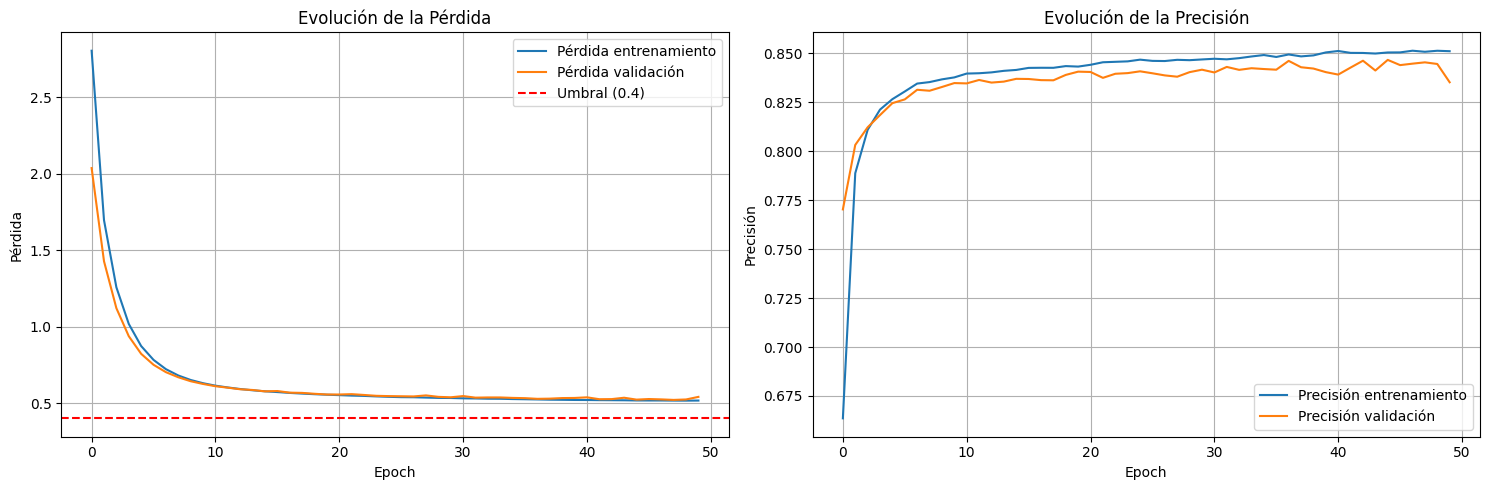


Resultados finales:
Epochs completados: 50
Pérdida final: 0.5163
Precisión final: 0.8510


In [23]:
import tensorflow as tf
print(tf.__version__)

### Tu código de la función callback para parar el entrenamiento de la red neuronal al 40% de loss aqui: ###
# Callback mejorado
class myCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super(myCallback, self).__init__()
        self.loss_history = []
        
    def on_epoch_end(self, epoch, logs={}):
        current_loss = logs.get('loss')
        self.loss_history.append(current_loss)
        
        # Solo detenemos si la pérdida es menor a 0.4 después de algunas epochs
        # para evitar detenciones prematuras
        if epoch > 5 and current_loss < 0.4:
            print(f"\nEpoch {epoch}: La pérdida ({current_loss:.4f}) ha bajado del 40%")
            self.model.stop_training = True

# Cargar datos
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Normalización
training_images = training_images / 255.0
test_images = test_images / 255.0

# Modelo simplificado
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # Reducimos a 128 neuronas y añadimos regularización
    tf.keras.layers.Dense(128, 
                         activation='relu',
                         kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilación con learning rate más bajo
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar con batch size más grande
callbacks = myCallback()
history = model.fit(
    training_images,
    training_labels,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[callbacks],
    verbose=1
)

# Visualización
plt.figure(figsize=(15, 5))

# Gráfica de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.axhline(y=0.4, color='r', linestyle='--', label='Umbral (0.4)')
plt.title('Evolución de la Pérdida')
plt.xlabel('Epoch')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

# Gráfica de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.title('Evolución de la Precisión')
plt.xlabel('Epoch')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Mostrar resultados finales
print("\nResultados finales:")
print(f"Epochs completados: {len(history.history['loss'])}")
print(f"Pérdida final: {history.history['loss'][-1]:.4f}")
print(f"Precisión final: {history.history['accuracy'][-1]:.4f}")